## Installing Yolo v5.
**Cloning directly from github.**
https://github.com/ultralytics/yolov5/wiki/Train-Custom-Data


In [ ]:
cd /content/drive/MyDrive/My-Table-Appliances-Object-Detection

/content/drive/MyDrive/My-Table-Appliances-Object-Detection


In [ ]:
pwd

'/content/drive/MyDrive/My-Table-Appliances-Object-Detection'

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone

Cloning into 'yolov5'...
remote: Enumerating objects: 14936, done.
remote: Total 14936 (delta 0), reused 0 (delta 0), pack-reused 14936
Receiving objects: 100% (14936/14936), 13.93 MiB | 7.37 MiB/s, done.
Resolving deltas: 100% (10264/10264), done.


In [ ]:
cd yolov5

/content/drive/MyDrive/My-Table-Appliances-Object-Detection/yolov5


In [ ]:
!pip install -r requirements.txt  # install

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 30.8 MB/s eta 0:00:00


## Importing required Libraries

In [ ]:
import torch
from IPython.display import Image  # for displaying images
import os 
import random
import shutil
from sklearn.model_selection import train_test_split
import xml.etree.ElementTree as ET
from xml.dom import minidom
from tqdm import tqdm
from PIL import Image, ImageDraw
import numpy as np
import cv2
import matplotlib.pyplot as plt

random.seed(108)
%matplotlib inline

In [ ]:
def make_bounding_box(image_path,file_path):
  file = open(file_path, 'r')
  lines = file.readlines()
  # print(lines)
  image = cv2.imread(image_path)
  image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  ih,iw,_ = image.shape
  for i in lines:
    label,x,y,w,h = map(float, i.split(' '))
    l = int((x - w / 2) * iw)
    r = int((x + w / 2) * iw)
    t = int((y - h / 2) * ih)
    b = int((y + h / 2) * ih)
    cv2.rectangle(image, (l, t), (r, b), (0, 0, 255), 3)
  return image

In [ ]:
cd /content/drive/MyDrive/My-Table-Appliances-Object-Detection/All Images

/content/drive/MyDrive/My-Table-Appliances-Object-Detection/All Images


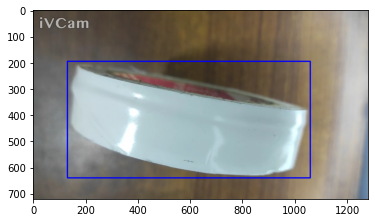

In [ ]:
image= "2023-01-08 134818.jpg"
annot = "2023-01-08 134818.txt"

image = make_bounding_box(image,annot)
plt.imshow(image)

In [ ]:
import os

base_path= "/content/drive/MyDrive/My-Table-Appliances-Object-Detection/All Images/"

image_names = []
image_labels = []

for i in os.listdir(base_path):
  if i.endswith(".jpg"):
    image_names.append(i)
    image_labels.append(i.split(".")[0]+".txt")


In [ ]:
len(image_names),len(image_labels)

(50, 50)

In [ ]:
image_names[5],image_labels[5]

('2023-01-08 134748.jpg', '2023-01-08 134748.txt')

In [ ]:
classes = []

classes_file_path = "classes.txt"

calsses_file = open(classes_file_path,'r')

class_names = calsses_file.readlines()

class_names

['DoubleTape\n',
 'Comb\n',
 'Glasses\n',
 'Scissors\n',
 'MeasuringTape\n',
 'BulbHolder\n',
 'Mouse\n']

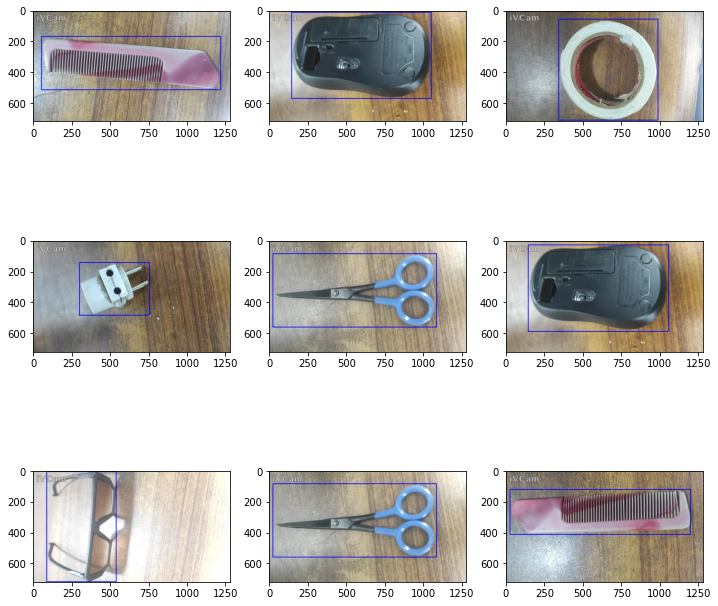

In [ ]:

fig,ax = plt.subplots(3,3,figsize=(12,12))
r,c = 0,0
for i in range(0,9):
  j = random.randint(0,len(image_names))
  image_path = image_names[j]
  label_path = image_labels[j]
  image = make_bounding_box(image_path,label_path)
  if c==3:
    c = 0
    r+=1
  ax[r,c].imshow(image)
  c+=1


## Creating Directories for labels and images separately

In [ ]:
cd /content/drive/MyDrive/My-Table-Appliances-Object-Detection

/content/drive/MyDrive/My-Table-Appliances-Object-Detection


In [ ]:
!mkdir train

In [ ]:
!cd train

In [ ]:
!pwd

/content/drive/MyDrive/My-Table-Appliances-Object-Detection


In [ ]:
!mkdir images

In [ ]:
!mkdir labels

In [ ]:
base_path = "/content/drive/MyDrive/My-Table-Appliances-Object-Detection/All Images"
train_images_path = "/content/drive/MyDrive/My-Table-Appliances-Object-Detection/Data/images/train"
train_labels_path = "/content/drive/MyDrive/My-Table-Appliances-Object-Detection/Data/labels/train"

In [ ]:


for i in os.listdir(base_path):
  if i.endswith(".jpg"):
    image_path = base_path+"/"+i
    dest_path = train_images_path+"/"+i
    shutil.copy(image_path,dest_path)
  else:
    label_path = base_path+"/"+i
    dest_path = train_labels_path+"/"+i
    shutil.copy(label_path,dest_path)

len(os.listdir(train_images_path)),len(os.listdir(train_labels_path))


(50, 52)

# Train an Object Detector

In [ ]:
cd /content/drive/MyDrive/My-Table-Appliances-Object-Detection/yolov5

/content/drive/MyDrive/My-Table-Appliances-Object-Detection/yolov5


In [ ]:
!python train.py --img 224 --cfg yolov5s.yaml --hyp hyp.scratch-med.yaml --batch 32 --epochs 100 --data my_table_model.yaml --weights yolov5s.pt --workers 24 --name yolo_my_table_appliances --cache

train: weights=yolov5s.pt, cfg=yolov5s.yaml, data=my_table_model.yaml, hyp=hyp.scratch-med.yaml, epochs=100, batch_size=32, imgsz=224, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=24, project=runs/train, name=yolo_my_table_appliances, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 1 commit. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5 🚀 v7.0-59-gfdc35b1 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.3, cls_pw=1.0, obj=

# Detecting

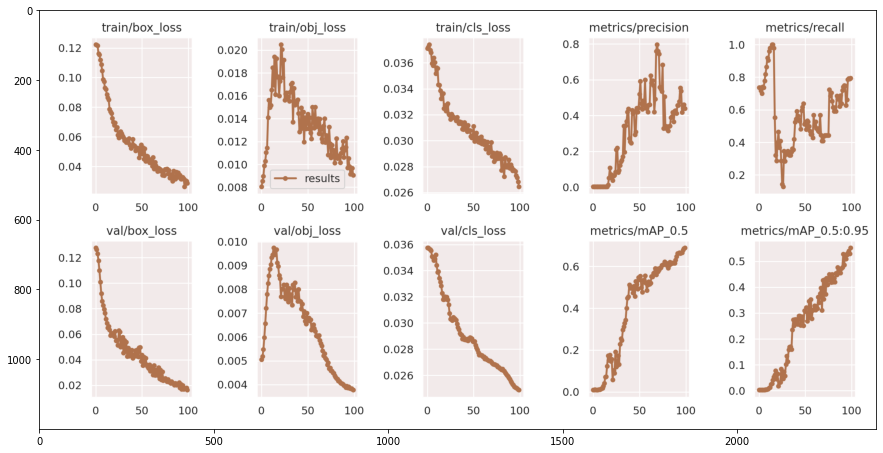

In [ ]:
result_image = "/content/drive/MyDrive/My-Table-Appliances-Object-Detection/yolov5/runs/train/yolo_my_table_appliances2/results.png"
result_image = cv2.imread(result_image)

fig = plt.figure(figsize=(15,20))
plt.imshow(result_image)

In [ ]:
cd /content/drive/MyDrive/My-Table-Appliances-Object-Detection/yolov5

/content/drive/MyDrive/My-Table-Appliances-Object-Detection/yolov5


In [26]:
!python detect.py --weights '/content/drive/MyDrive/My-Table-Appliances-Object-Detection/yolov5/runs/train/yolo_my_table_appliances2/weights/best.pt' --img 240 --source '/content/drive/MyDrive/My-Table-Appliances-Object-Detection/random_test_images'

detect: weights=['/content/drive/MyDrive/My-Table-Appliances-Object-Detection/yolov5/runs/train/yolo_my_table_appliances2/weights/best.pt'], source=/content/drive/MyDrive/My-Table-Appliances-Object-Detection/random_test_images, data=data/coco128.yaml, imgsz=[240, 240], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-59-gfdc35b1 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7029004 parameters, 0 gradients
WARNING ⚠️ --img-size [240, 240] must be multiple of max stride 32, updating to [256, 256]
image 1/12 /content/drive/MyDrive/My-Table-Appliances-Object-Detection/random_test_images/1.jpg: 160x256 1 DoubleTape, 